<a href="https://colab.research.google.com/github/PALBIBEK/Donars-Classification/blob/main/Donar_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder


In [110]:
data=pd.read_csv('/content/census.csv')

data.describe()

data.head(n=5)



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [111]:
# Check for null entries
null_entries = data.isnull().sum()
print("\nNull entries in each column:\n", null_entries)


Null entries in each column:
 age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


Total number of records 45222
Total number of persons with income less than 50K is 34014
Total number of persons with income greater than 50K is 11208.
So We can see the dataset is imbalanced towards income less than 50K


In [112]:
total_records=len(data)

n_records_less_than_50k=len(data[data['income']=='<=50K'])

n_records_greater_than_50K=len(data[data['income']=='>50K'])

print("Total number of records {}".format(total_records))
print("Total number of persons with income less than 50K is {}".format(n_records_less_than_50k))
print("Total number of persons with income greater than 50K is {}".format(n_records_greater_than_50K))

Total number of records 45222
Total number of persons with income less than 50K is 34014
Total number of persons with income greater than 50K is 11208


Below I showed how decision trees are sensitive to duplicate row. So, I removed the duplicate rows.

In [113]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Drop duplicate rows and reindex the DataFrame
data_cleaned = data.drop_duplicates().reset_index(drop=True)

# Display the cleaned DataFrame
print(data_cleaned.head(n=5))
print(data_cleaned.describe())

Number of duplicate rows: 5982
   age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   capital-loss  hours-per-week  native-country i

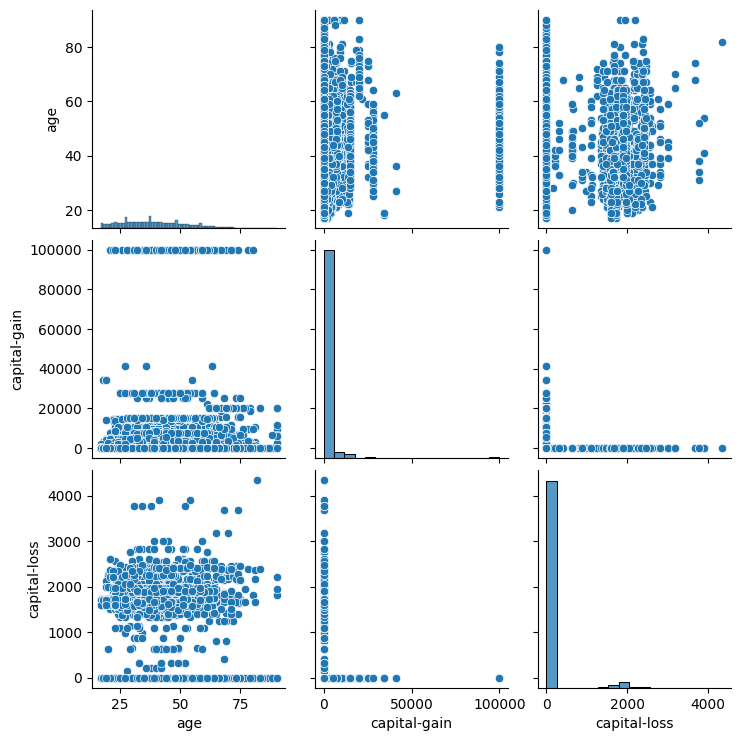

In [114]:
cols=['age','capital-gain','capital-loss']

sb.pairplot(data_cleaned[cols])

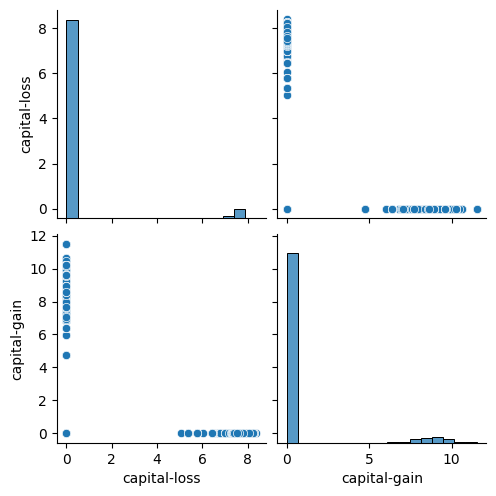

In [115]:
# Log-transforming skewed features
skewed = ['capital-loss', 'capital-gain']
data_cleaned[skewed] = data_cleaned[skewed].apply(lambda x: np.log(x + 1))
sb.pairplot(data_cleaned[['capital-loss','capital-gain']])

In [116]:
# Splitting the data into features and targets
income_raw = data_cleaned['income']
data_cleaned.drop('income', axis=1,inplace=True)
data_cleaned.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba


Number of unique categories in 'marital-status': 7
Number of unique categories in 'workclass': 7
Number of unique categories in 'education_level': 16
Number of unique categories in 'occupation': 14
Number of unique categories in 'relationship': 6
Number of unique categories in 'race': 5
Number of unique categories in 'native-country': 41
Number of unique categories in 'sex': 2
Distribution of categories in 'marital-status':
marital-status
 Married-civ-spouse       17947
 Never-married            12169
 Divorced                  5885
 Separated                 1394
 Widowed                   1261
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: count, dtype: int64


<ipython-input-117-edc930b4526d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


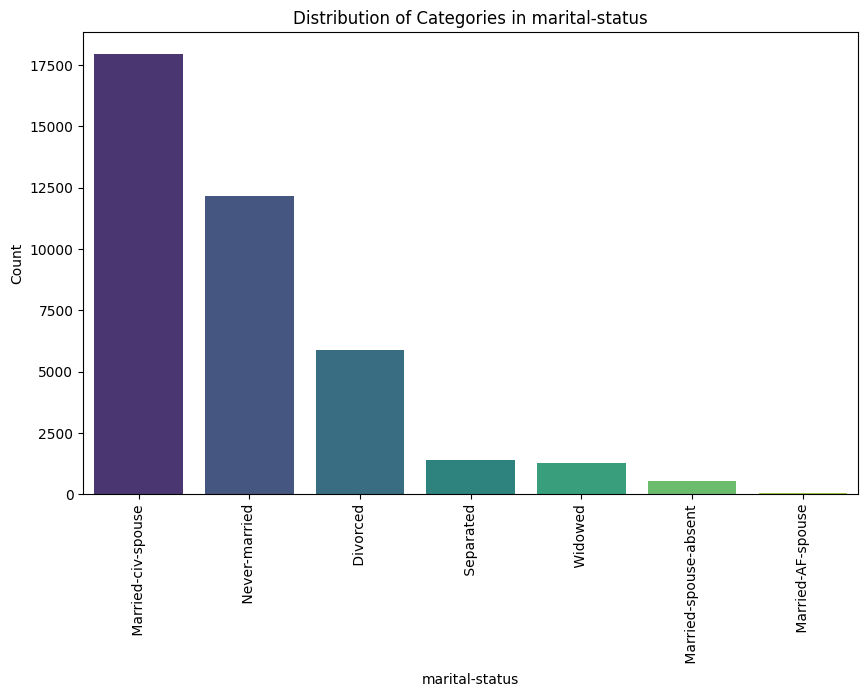

Distribution of categories in 'workclass':
workclass
 Private             27717
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: count, dtype: int64


<ipython-input-117-edc930b4526d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


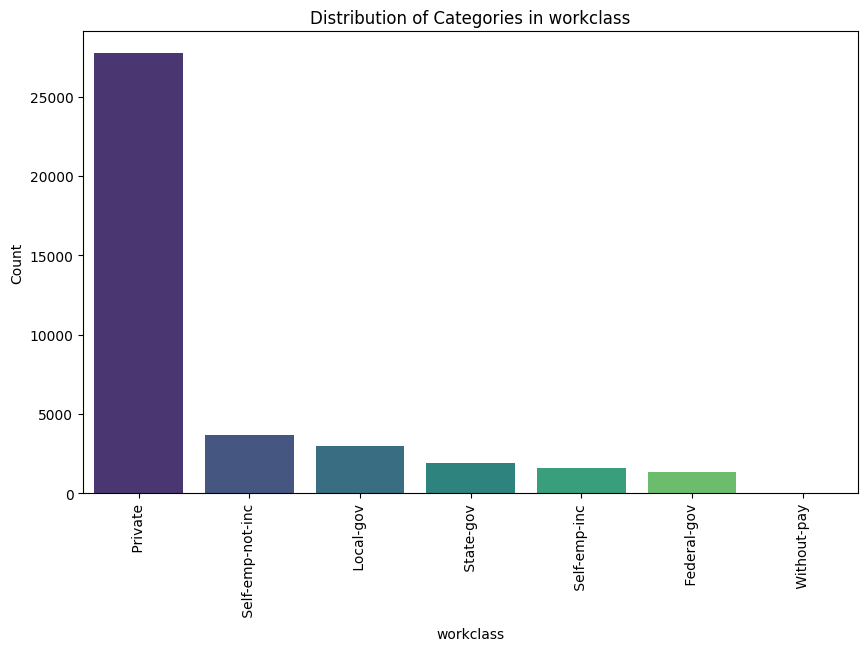

Distribution of categories in 'education_level':
education_level
 HS-grad         12003
 Some-college     8457
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: count, dtype: int64


<ipython-input-117-edc930b4526d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


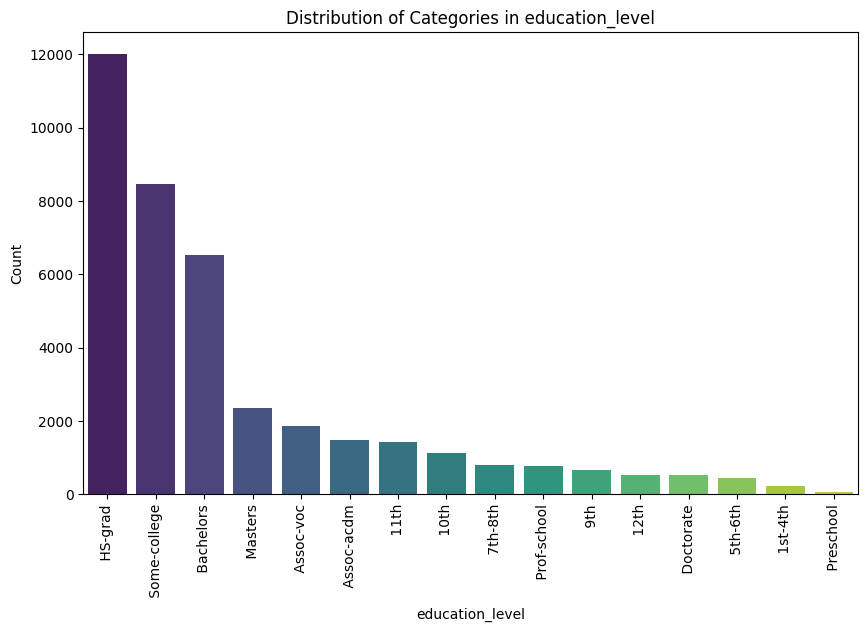

Distribution of categories in 'occupation':
occupation
 Prof-specialty       5516
 Exec-managerial      5311
 Adm-clerical         4742
 Sales                4671
 Craft-repair         4634
 Other-service        4252
 Machine-op-inspct    2440
 Transport-moving     2032
 Handlers-cleaners    1712
 Farming-fishing      1424
 Tech-support         1325
 Protective-serv       937
 Priv-house-serv       230
 Armed-Forces           14
Name: count, dtype: int64


<ipython-input-117-edc930b4526d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


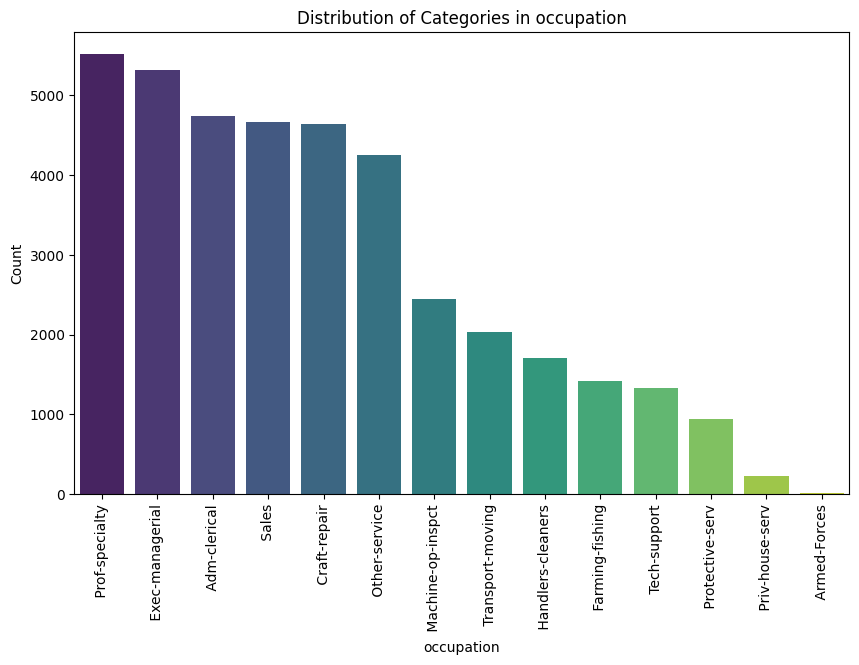

Distribution of categories in 'relationship':
relationship
 Husband           15645
 Not-in-family     10530
 Own-child          5194
 Unmarried          4547
 Wife               2004
 Other-relative     1320
Name: count, dtype: int64


<ipython-input-117-edc930b4526d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


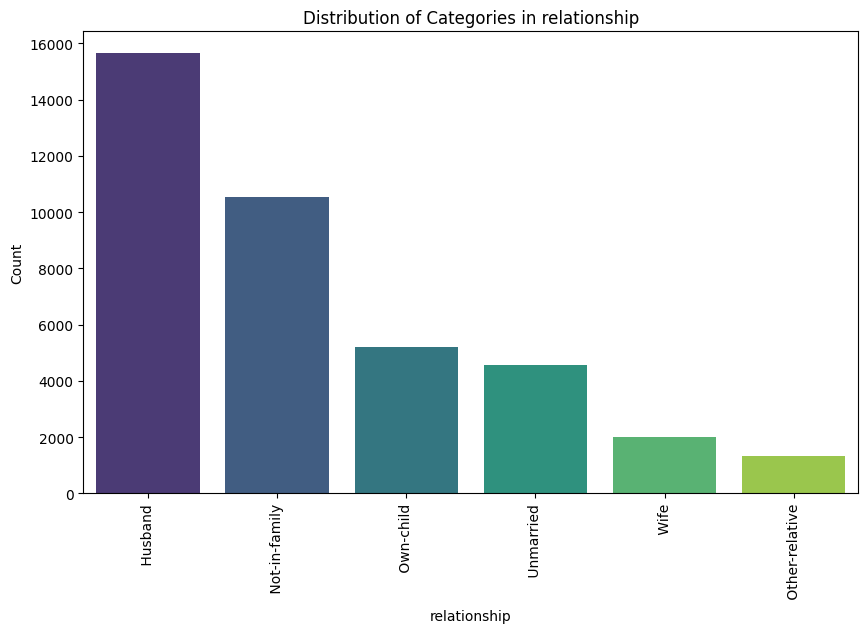

Distribution of categories in 'race':
race
 White                 33064
 Black                  4089
 Asian-Pac-Islander     1299
 Amer-Indian-Eskimo      435
 Other                   353
Name: count, dtype: int64


<ipython-input-117-edc930b4526d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


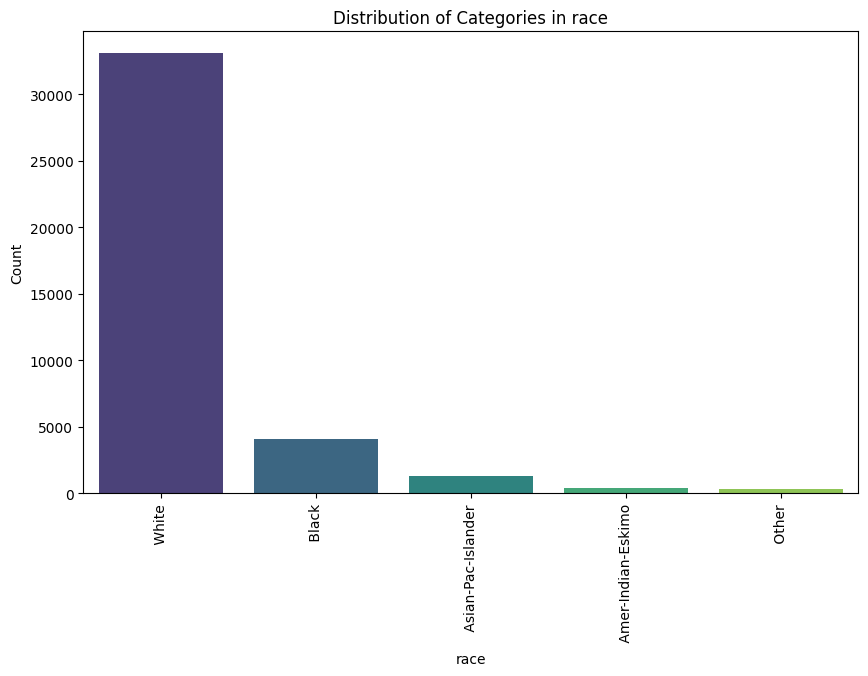

Distribution of categories in 'native-country':
native-country
 United-States                 35340
 Mexico                          879
 Philippines                     281
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         102
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        84
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua  

<ipython-input-117-edc930b4526d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


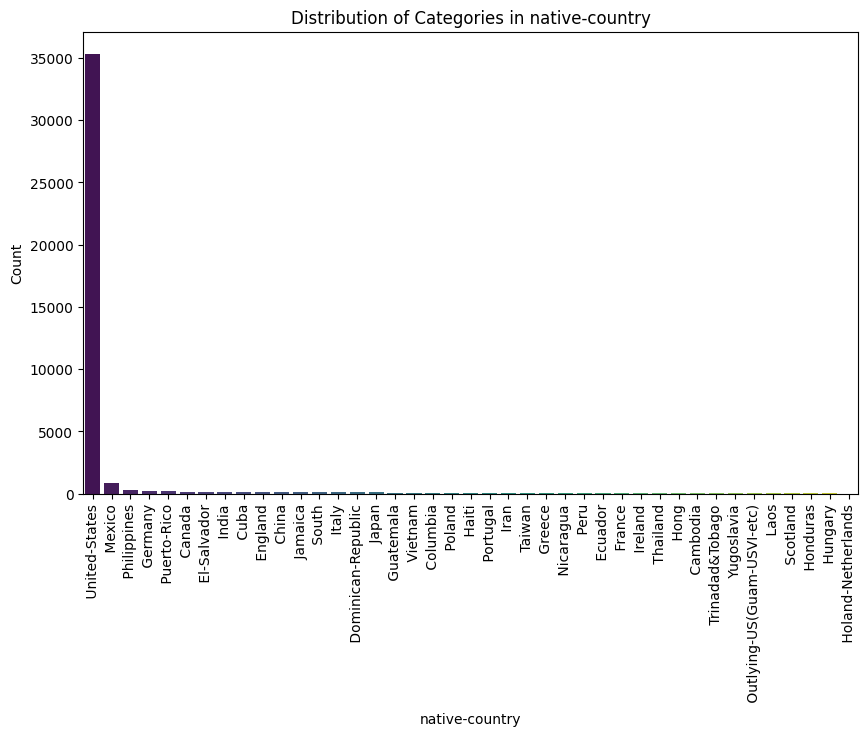

Distribution of categories in 'sex':
sex
 Male      26097
 Female    13143
Name: count, dtype: int64


<ipython-input-117-edc930b4526d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


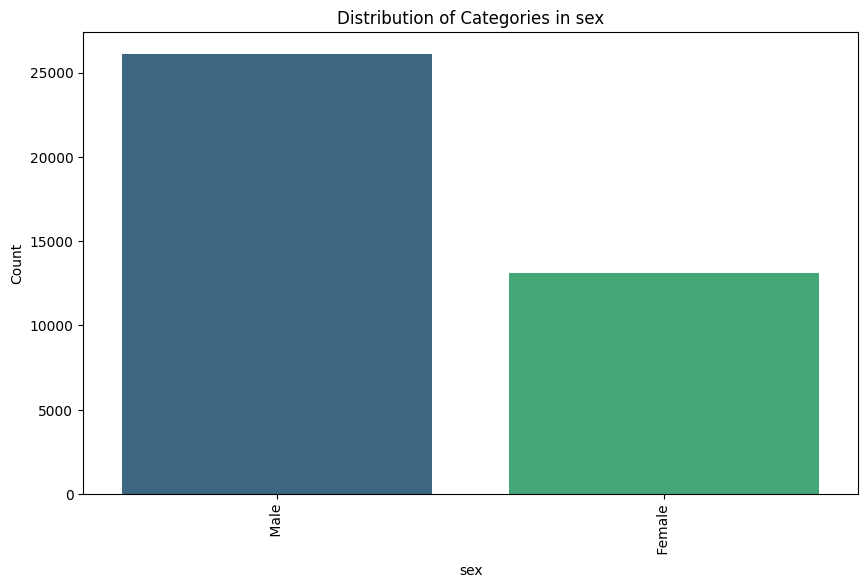

In [117]:
categorical_columns = ['marital-status', 'workclass', 'education_level', 'occupation', 'relationship', 'race', 'native-country','sex']
for column in categorical_columns:
    unique_categories = data_cleaned[column].nunique()
    print(f"Number of unique categories in '{column}': {unique_categories}")


# Checking and visualizing the distribution of each category for categorical columns
for column in categorical_columns:
    category_counts = data_cleaned[column].value_counts()
    print(f"Distribution of categories in '{column}':")
    print(category_counts)
    plt.figure(figsize=(10, 6))
    sb.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title(f'Distribution of Categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

As we can the frequency of United State is much higher than all othe native country. So, If I perform OneHotEncoding on this feature, it might dominate other feature which choosing best split . The reason is native country is high cardinality categorical feature with cardinality 40. But Other features has less cardinality.

<ipython-input-118-1b81cf2b98bf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=data_cleaned['native-country'].value_counts().index, y=data_cleaned['native-country'].value_counts().values, palette='viridis')


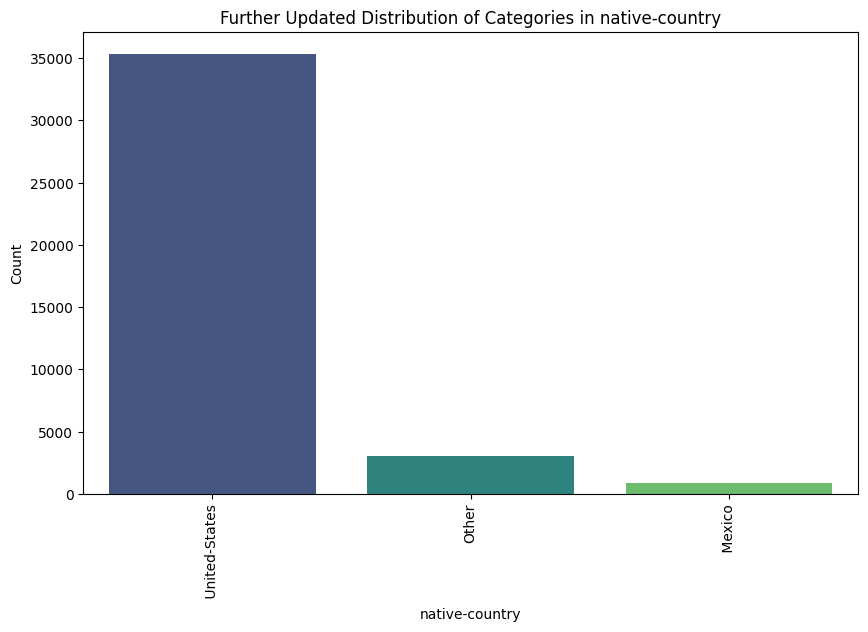

In [118]:
# Adjust threshold to combine more categories if necessary
threshold = 500  # Example threshold for combining more categories
value_counts = data_cleaned['native-country'].value_counts()
to_combine = value_counts[value_counts < threshold].index
data_cleaned['native-country'] = data_cleaned['native-country'].replace(to_combine, 'Other')
data_cleaned.head()
#Visualize the updated distribution
plt.figure(figsize=(10, 6))
sb.barplot(x=data_cleaned['native-country'].value_counts().index, y=data_cleaned['native-country'].value_counts().values, palette='viridis')
plt.title('Further Updated Distribution of Categories in native-country')
plt.xlabel('native-country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


Here I am experimenting with different feature importance values and find a threshold. After trying some values and looking at the distribution of feature importance of various feature , I try to check the model performance by considering a decision tree built using the features with feature importance more than 0.05 and compare it's classification report with full grown decision tree with all features. As we know that full grown decision tree will overfit , so comparing it with a tree with less features gives us insight which features are important.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Features with importance greater than 0.05:
                              Feature  Importance
0                                 age    0.171046
1                        capital-gain    0.148901
3                       education-num    0.092378
4                      hours-per-week    0.094546
7  marital-status_ Married-civ-spouse    0.204285

Features with importance less than or equal to 0.05:
                                  Feature  Importance
2                            capital-loss    0.045169
5                marital-status_ Divorced    0.004121
6       marital-status_ Married-AF-spouse    0.000404
8   marital-status_ Married-spouse-absent    0.000916
9           marital-status_ Never-married    0.002877
10              marital-status_ Separated    0.001624
11                marital-status_ Widowed    0.001996
12                 workclass_ Federal-gov    0.007355
13                   workclass_ Local-gov    0.007414
14                     workclass_ Private    0.015060
15      

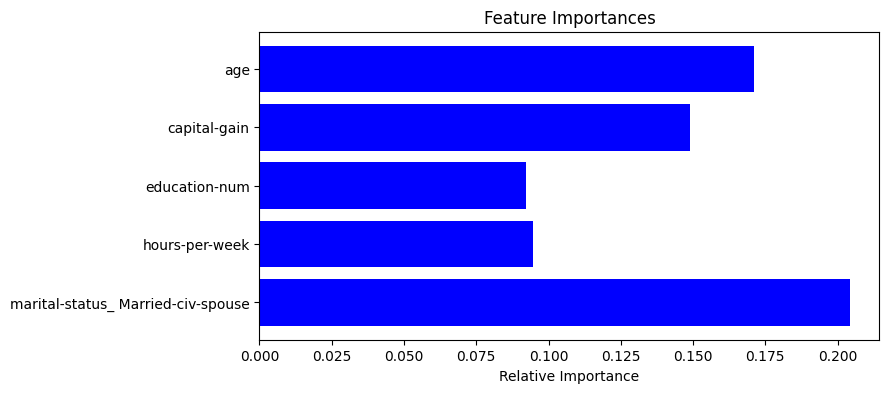

Classification Report (All Features):
              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      5876
        >50K       0.61      0.61      0.61      1972

    accuracy                           0.80      7848
   macro avg       0.74      0.74      0.74      7848
weighted avg       0.80      0.80      0.80      7848

Classification Report (Important Features Only):
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      5876
        >50K       0.65      0.56      0.60      1972

    accuracy                           0.81      7848
   macro avg       0.75      0.73      0.74      7848
weighted avg       0.81      0.81      0.81      7848



In [119]:
# Identify categorical columns
categorical_columns = ['marital-status', 'workclass', 'education_level', 'occupation', 'relationship', 'race', 'native-country','sex']
numerical_cols = data_cleaned.columns.difference(categorical_columns).tolist()



X_train, X_temp, y_train, y_temp = train_test_split(data_cleaned, income_raw, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encoding categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate encoded categorical columns with numerical columns for training data
X_train = pd.concat([X_train[numerical_cols].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)

# Transform validation and test data using the same encoder
X_val_encoded = encoder.transform(X_val[categorical_columns])
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_val = pd.concat([X_val[numerical_cols].reset_index(drop=True), X_val_encoded_df.reset_index(drop=True)], axis=1)

X_test_encoded = encoder.transform(X_test[categorical_columns])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test = pd.concat([X_test[numerical_cols].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Creating and training a fully grown decision tree with all features
tree_all_features = DecisionTreeClassifier(random_state=42)
tree_all_features.fit(X_train, y_train)

# Getting feature importances
importances = tree_all_features.feature_importances_
feature_names = X_train.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Filtering features with importance greater than 0.05
important_features = feature_importances[feature_importances['Importance'] > 0.05]
zero_importance_features = feature_importances[feature_importances['Importance'] <= 0.05]
# Printing important features
print("Features with importance greater than 0.05:")
print(important_features)

# Printing zero importance features and their count
print("\nFeatures with importance less than or equal to 0.05:")
print(zero_importance_features)
print(f"\nNumber of features with importance less than or equal to 0.05: {zero_importance_features.shape[0]}")

# Plotting feature importances
plt.figure(figsize=(8, 4))
plt.title('Feature Importances')
plt.barh(important_features['Feature'], important_features['Importance'], color='b', align='center')
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()

# Classification report with all features
y_pred_all_features = tree_all_features.predict(X_test)
print("Classification Report (All Features):")
print(classification_report(y_test, y_pred_all_features))

# Creating and training a decision tree with important features only
important_feature_names = important_features['Feature'].values
X_train_important = X_train[important_feature_names]
X_test_important = X_test[important_feature_names]

tree_important_features = DecisionTreeClassifier(random_state=42)
tree_important_features.fit(X_train_important, y_train)

# Classification report with important features only
y_pred_important_features = tree_important_features.predict(X_test_important)
print("Classification Report (Important Features Only):")
print(classification_report(y_test, y_pred_important_features))

In the above result, As we can see if I consider important features , overall performance over all metrics improved. Now, the question, how to chosse optimal feature importance value. To find that ,I use the idea of binning of feature importance. I don't know whether it's a right approach or not.But, I create intervals.Say ,cuurent bin is [x,y].Then I will consider all those feature with importance greater then y. Then check corresponding classification report using X_val. It will help me to find what is the minimum feature importance I should look for so that after which metrics of classification report does not improve.

In [120]:
tree_all_features = DecisionTreeClassifier(random_state=42, min_impurity_decrease=0.0001)
tree_all_features.fit(X_train, y_train)

# Getting feature importances
importances = tree_all_features.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# List unique values of feature importances
unique_importances = np.unique(importances)
print("Unique feature importances:", unique_importances)

# Binning the importances with smaller values
bins = np.linspace(min(unique_importances), max(unique_importances), num=7)
print("Bins:", bins)

# Function to train and evaluate a decision tree with features in a specific bin
def train_evaluate_tree(X_train, y_train, X_test, y_test, selected_features):
    X_train_bin = X_train[selected_features]
    X_val_bin = X_val[selected_features]

    tree_bin = DecisionTreeClassifier(random_state=42, min_impurity_decrease=0.0001)
    tree_bin.fit(X_train_bin, y_train)

    y_pred_bin = tree_bin.predict(X_val_bin)
    print("Classification Report (Bin Features):")
    print(classification_report(y_test, y_pred_bin))

# Building and evaluating trees for each bin
for i in range(len(bins) - 1):
    bin_min = bins[i]
    bin_max = bins[i + 1]

    selected_features = feature_importances[(feature_importances['Importance'] > bin_min)]['Feature']
    if not selected_features.empty:
        print(f"\nTraining and evaluating tree with features in bin ({bin_min}, {bin_max}):")
        train_evaluate_tree(X_train, y_train, X_val, y_val, selected_features)

# Create a decision tree with important features only (feature importance > 0.05)
important_features = feature_importances[feature_importances['Importance'] > 0.05]
important_feature_names = important_features['Feature'].values
X_train_important = X_train[important_feature_names]
X_test_important = X_test[important_feature_names]

tree_important_features = DecisionTreeClassifier(random_state=42, min_impurity_decrease=0.0001)
tree_important_features.fit(X_train_important, y_train)

# Classification report with important features only
y_pred_important_features = tree_important_features.predict(X_test_important)
print("Classification Report (Important Features Only):")
print(classification_report(y_test, y_pred_important_features))

Unique feature importances: [0.         0.0005423  0.00055529 0.00055747 0.00057161 0.00057408
 0.00057432 0.00057505 0.00058761 0.0005978  0.00064743 0.000666
 0.00072358 0.00076374 0.00082447 0.00086291 0.00091024 0.00093438
 0.00113384 0.00119077 0.00119923 0.0012251  0.00127865 0.00130706
 0.00151192 0.00167717 0.0017128  0.00224885 0.0022651  0.00284033
 0.00331702 0.00344773 0.00656197 0.00741733 0.00980699 0.03290304
 0.04208814 0.06802332 0.15784165 0.2572711  0.38026261]
Bins: [0.         0.0633771  0.1267542  0.19013131 0.25350841 0.31688551
 0.38026261]

Training and evaluating tree with features in bin (0.0, 0.06337710212433517):
Classification Report (Bin Features):
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      5877
        >50K       0.78      0.60      0.68      1971

    accuracy                           0.86      7848
   macro avg       0.83      0.77      0.79      7848
weighted avg       0.85      0.86      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5877
        >50K       0.00      0.00      0.00      1971

    accuracy                           0.75      7848
   macro avg       0.37      0.50      0.43      7848
weighted avg       0.56      0.75      0.64      7848

Classification Report (Important Features Only):
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      5876
        >50K       0.79      0.57      0.66      1972

    accuracy                           0.85      7848
   macro avg       0.83      0.76      0.78      7848
weighted avg       0.85      0.85      0.85      7848



As we can see above after feature importance =0.063 , the result does not get better if I consider features with importance less than 0.063.So ,from now on, I will get the feature_importance parameter as 0.063.

In [121]:
# Create a decision tree with important features only (feature importance > 0.063)
important_features = feature_importances[feature_importances['Importance'] > 0.063]
important_feature_names = important_features['Feature'].values
X_train_important = X_train[important_feature_names]
X_test_important = X_test[important_feature_names]

tree_important_features = DecisionTreeClassifier(random_state=42)
tree_important_features.fit(X_train_important, y_train)

# Classification report with important features only
y_pred_important_features = tree_important_features.predict(X_test_important)
print("Classification Report (Important Features Only):")
print(classification_report(y_test, y_pred_important_features))



Classification Report (Important Features Only):
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      5876
        >50K       0.79      0.58      0.67      1972

    accuracy                           0.86      7848
   macro avg       0.83      0.77      0.79      7848
weighted avg       0.85      0.86      0.85      7848



Similar idea I used to find the minimum impurity decrease. As we know in a fullgrown tree ,the impurity of leaf node is 0. That might overfit.So again I searched over all leaf impurity value bin them and try to find a threshold. I don't find any other idea .Because,I try to plot the tree, it is hard to visualize and analyze the gini index values.After binning I find that the model performs well with minimum impurity 0 at leaf as a threshold value. I analyze this using classification repot on X_val.

In [122]:
# Function to get unique leaf node impurities
def get_leaf_impurities(tree):
    tree_ = tree.tree_
    impurities = tree_.impurity
    is_leaf = np.where(tree_.children_left == -1)[0]
    leaf_impurities = impurities[is_leaf]
    return np.unique(leaf_impurities)

# Calculate unique leaf node impurities
leaf_impurities = get_leaf_impurities(tree_important_features)
print("Unique leaf node impurities:", leaf_impurities)

Unique leaf node impurities: [0.         0.015872   0.01868993 0.01999796 0.02019992 0.03035332
 0.0392     0.04038686 0.04325061 0.06050432 0.07090971 0.0768
 0.09070295 0.10493827 0.11002651 0.11160586 0.12760368 0.1723356
 0.17265543 0.1748179  0.18869019 0.19284149 0.19932093 0.22181537
 0.26451365 0.31100137 0.31459692 0.32       0.35596412 0.375
 0.40816327 0.42346684 0.4296875  0.44444444 0.44950991 0.4578564
 0.46875    0.47938136 0.48       0.48693682 0.48729259 0.48979592
 0.49597687 0.49924102 0.5       ]


In [123]:
bins = np.linspace(min(leaf_impurities), max(leaf_impurities), num=10)
print("Bins:", bins)

# Function to train and evaluate a decision tree with a specific impurity threshold
def train_evaluate_tree_with_impurity_threshold(X_train, y_train, X_test, y_test, min_impurity_decrease):
    tree = DecisionTreeClassifier(random_state=42, min_impurity_decrease=min_impurity_decrease)
    tree.fit(X_train_important, y_train)
    y_pred = tree.predict(X_test)
    print(f"Classification Report (Min Impurity Decrease: {min_impurity_decrease}):")
    print(classification_report(y_test, y_pred))

# Building and evaluating trees for each bin
for i in range(len(bins) - 1):
    bin_min = bins[i]
    bin_max = bins[i + 1]
    print(f"\nTraining and evaluating tree with impurity threshold greater than equal to ({bin_min}):")
    train_evaluate_tree_with_impurity_threshold(X_train_important, y_train, X_val_important, y_val, bin_min)


Bins: [0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5       ]

Training and evaluating tree with impurity threshold greater than equal to (0.0):
Classification Report (Min Impurity Decrease: 0.0):
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      5877
        >50K       0.79      0.58      0.67      1971

    accuracy                           0.86      7848
   macro avg       0.83      0.77      0.79      7848
weighted avg       0.85      0.86      0.85      7848


Training and evaluating tree with impurity threshold greater than equal to (0.05555555555555555):
Classification Report (Min Impurity Decrease: 0.05555555555555555):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5877
        >50K       0.00      0.00      0.00      1971

    accuracy                           0.75      7848
   macro avg       0.37      0.50      0.43      7848
weighted avg       0.56      0.75      0.64      7848


Training and evaluating tree with impurity threshold greater than equal to (0.1111111111111111):
Classification Report (Min Impurity Decrease: 0.1111111111111111):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5877
        >50K       0.00      0.00      0.00      1971

    accuracy                           0.75      7848
   macro avg       0.37      0.50      0.43      7848
weighted avg       0.56      0.75      0.64      7848


Training and evaluating tree with impurity threshold greater than equal to (0.16666666666666666):
Classification Report (Min Impurity Decrease: 0.16666666666666666):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5877
        >50K       0.00      0.00      0.00      1971

    accuracy                           0.75      7848
   macro avg       0.37      0.50      0.43      7848
weighted avg       0.56      0.75      0.64      7848


Training and evaluating tree with impurity threshold greater than equal to (0.2222222222222222):
Classification Report (Min Impurity Decrease: 0.2222222222222222):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5877
        >50K       0.00      0.00      0.00      1971

    accuracy                           0.75      7848
   macro avg       0.37      0.50      0.43      7848
weighted avg       0.56      0.75      0.64      7848


Training and evaluating tree with impurity threshold greater than equal to (0.2777777777777778):
Classification Report (Min Impurity Decrease: 0.2777777777777778):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5877
        >50K       0.00      0.00      0.00      1971

    accuracy                           0.75      7848
   macro avg       0.37      0.50      0.43      7848
weighted avg       0.56      0.75      0.64      7848


Training and evaluating tree with impurity threshold greater than equal to (0.3333333333333333):
Classification Report (Min Impurity Decrease: 0.3333333333333333):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5877
        >50K       0.00      0.00      0.00      1971

    accuracy                           0.75      7848
   macro avg       0.37      0.50      0.43      7848
weighted avg       0.56      0.75      0.64      7848


Training and evaluating tree with impurity threshold greater than equal to (0.38888888888888884):
Classification Report (Min Impurity Decrease: 0.38888888888888884):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5877
        >50K       0.00      0.00      0.00      1971

    accuracy                           0.75      7848
   macro avg       0.37      0.50      0.43      7848
weighted avg       0.56      0.75      0.64      7848


Training and evaluating tree with impurity threshold greater than equal to (0.4444444444444444):
Classification Report (Min Impurity Decrease: 0.4444444444444444):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      5877
        >50K       0.00      0.00      0.00      1971

    accuracy                           0.75      7848
   macro avg       0.37      0.50      0.43      7848
weighted avg       0.56      0.75      0.64      7848



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since the data was imbalanced ,so I find it interesting to experiment with class_weights. As if I consider the points with label >50K with a higher weight ,the tree will be such that at leaf nodes ,it will try to keep minimum weight of samples having >50K income.

In [124]:
# Train decision tree with class weights to handle class imbalance and min_weight_fraction_leaf parameter
tree_important_features = DecisionTreeClassifier(
    random_state=42,
    min_weight_fraction_leaf=0.001,
    class_weight={'<=50K': 1, '>50K': 3.03}  # Adjust class weights to balance the dataset
)
tree_important_features.fit(X_train_important, y_train)
# Classification report with important features only
y_pred_important_features = tree_important_features.predict(X_test_important)
print("Classification Report (Important Features Only):")
print(classification_report(y_test, y_pred_important_features))

Classification Report (Important Features Only):
              precision    recall  f1-score   support

       <=50K       0.95      0.75      0.84      5876
        >50K       0.54      0.88      0.67      1972

    accuracy                           0.78      7848
   macro avg       0.74      0.81      0.75      7848
weighted avg       0.85      0.78      0.80      7848



In [125]:
def train_evaluate_tree_with_class_weights(X_train, y_train, X_test, y_test, class_weight):
    tree = DecisionTreeClassifier(
        random_state=42,
        min_weight_fraction_leaf=0.01,
        class_weight=class_weight
    )
    tree.fit(X_train_important, y_train)
    y_pred = tree.predict(X_test_important)
    print(f"Classification Report (Class Weight: {class_weight}):")
    print(classification_report(y_test, y_pred))

# Range of class weights to test
class_weights = [
    {'<=50K': 1, '>50K': 1},
    {'<=50K': 1, '>50K': 2},
    {'<=50K': 1, '>50K': 3},
    {'<=50K': 1, '>50K': 4},
    {'<=50K': 1, '>50K': 5}
]

# Evaluate model with each class weight
for cw in class_weights:
    print(f"\nTraining and evaluating tree with class weight: {cw}")
    train_evaluate_tree_with_class_weights(X_train, y_train, X_test, y_test, cw)


Training and evaluating tree with class weight: {'<=50K': 1, '>50K': 1}
Classification Report (Class Weight: {'<=50K': 1, '>50K': 1}):
              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90      5876
        >50K       0.76      0.55      0.64      1972

    accuracy                           0.84      7848
   macro avg       0.81      0.75      0.77      7848
weighted avg       0.84      0.84      0.83      7848


Training and evaluating tree with class weight: {'<=50K': 1, '>50K': 2}
Classification Report (Class Weight: {'<=50K': 1, '>50K': 2}):
              precision    recall  f1-score   support

       <=50K       0.90      0.85      0.88      5876
        >50K       0.62      0.70      0.66      1972

    accuracy                           0.82      7848
   macro avg       0.76      0.78      0.77      7848
weighted avg       0.83      0.82      0.82      7848


Training and evaluating tree with class weight: {'<=50K': 1, '>50K': 3}
C

One of the interesting thing is that when I try to put higher weights to class >50K,in the classification report as we can see that the recall of the class >50k increases, but recall of the class <=50k decreases. It is obvious as it will increase class weight for minority class, it will give more importance to classify the samples with >50k income overall samples with >50k income as a tradeoff the recall of class <=50k decreases. So in some sense, since we have lesser samples of minority class ,it is hard to analyze it's characteristic,but it is easeier to haver higher recall for class with higher samples.




In the below section , I tried to implement the cost complexity prunning to find the optimal max depth. Here while constructing the tree ,I make sure that I use only important features.

Optimal alpha: 2.7532272599155305e-05
Optimal depth: 13
Classification Report (Pruned Tree):
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      5876
        >50K       0.79      0.58      0.67      1972

    accuracy                           0.86      7848
   macro avg       0.83      0.77      0.79      7848
weighted avg       0.85      0.86      0.85      7848



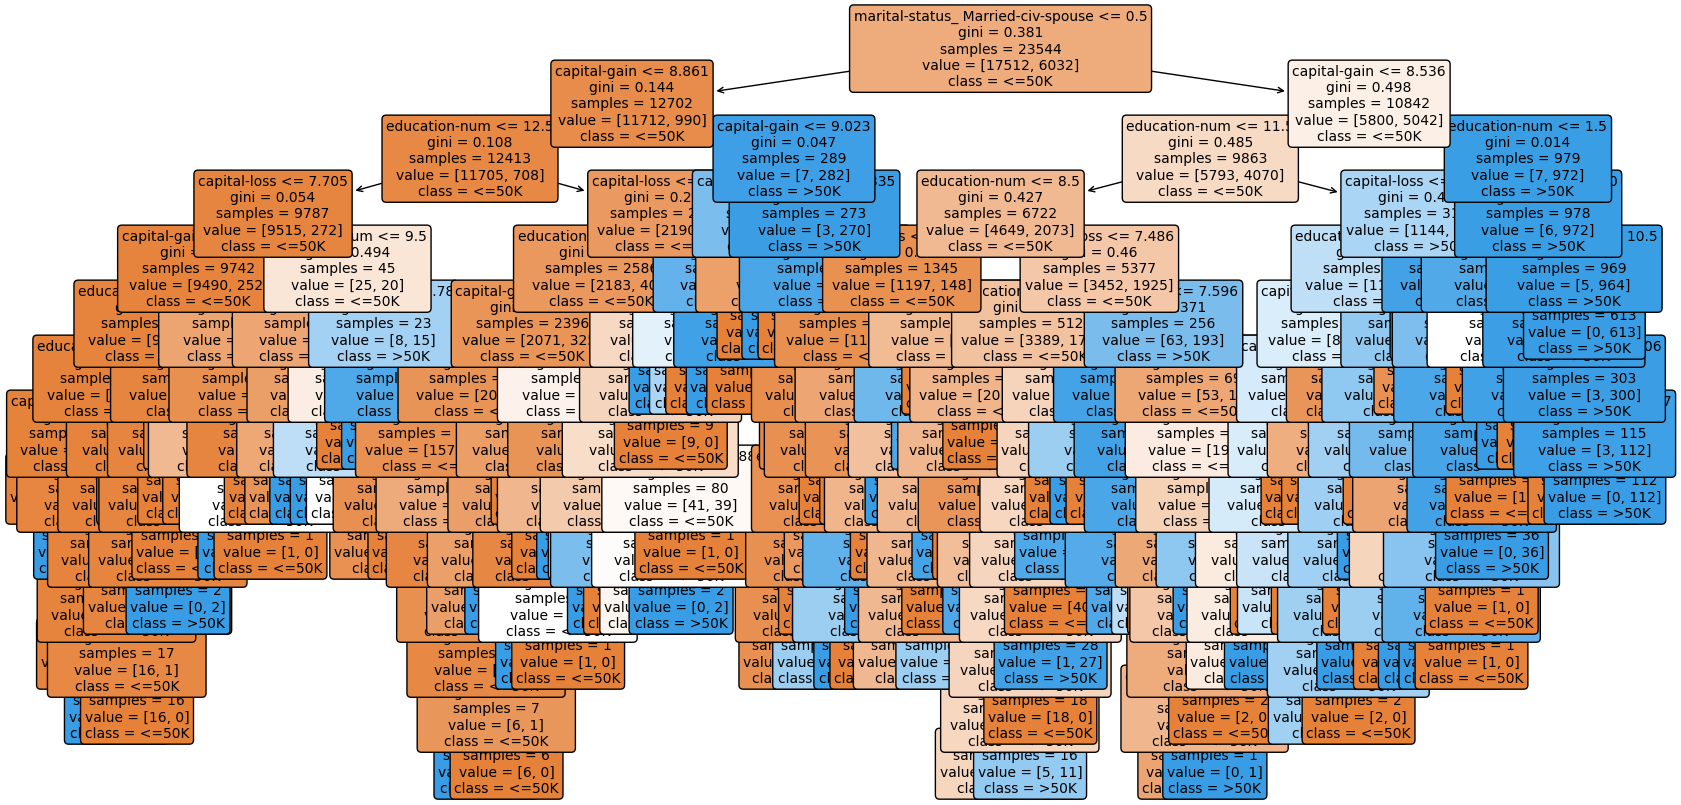

In [126]:
from sklearn.model_selection import cross_val_score, KFold
X_train_important = X_train[important_feature_names]
X_val_important = X_val[important_feature_names]
X_test_important = X_test[important_feature_names]

# Train the initial decision tree with important features
tree_important = DecisionTreeClassifier(random_state=42)
tree_important.fit(X_train_important, y_train)

# Perform cost complexity pruning
path = tree_important.cost_complexity_pruning_path(X_train_important, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train decision trees using different alphas with cross-validation
validation_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X_train_important, y_train, cv=kf)
    validation_scores.append(scores.mean())

# Find the optimal alpha with the highest validation score
optimal_alpha_index = np.argmax(validation_scores)
optimal_alpha = ccp_alphas[optimal_alpha_index]

# Train the optimal tree
optimal_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
optimal_tree.fit(X_train_important, y_train)

# Print the optimal alpha, optimal depth, and the classification report for the pruned tree
print(f"Optimal alpha: {optimal_alpha}")
print(f"Optimal depth: {optimal_tree.get_depth()}")
y_pred = optimal_tree.predict(X_test_important)
print("Classification Report (Pruned Tree):")
print(classification_report(y_test, y_pred))

# Visualize the pruned tree
plt.figure(figsize=(20, 10))
plot_tree(optimal_tree, feature_names=important_feature_names, class_names=optimal_tree.classes_, filled=True, rounded=True, fontsize=10)
plt.show()

The below is a random forest classifier

1. I try to use oversampling of important features
X_train_oversampled = pd.concat([X_train, X_train_important], axis=1)
X_val_oversampled = pd.concat([X_val, X_val_important], axis=1)
X_test_oversampled = pd.concat([X_test, X_test_important], axis=1)

2.To find the n_estimators,I used this idea of warm_start=True which make sure that we don't try to construct the tree from start.

3.Plot the accuracy_score of majority , minority class and the Training_score.

4.But I don't know why the validation score is higher.

n_estimators: 10, Train Score: 0.826, Validation Score (Majority): 0.912, Validation Score (Minority): 0.584
n_estimators: 20, Train Score: 0.827, Validation Score (Majority): 0.909, Validation Score (Minority): 0.592
n_estimators: 30, Train Score: 0.827, Validation Score (Majority): 0.907, Validation Score (Minority): 0.604
n_estimators: 40, Train Score: 0.829, Validation Score (Majority): 0.906, Validation Score (Minority): 0.605
n_estimators: 50, Train Score: 0.829, Validation Score (Majority): 0.906, Validation Score (Minority): 0.610
n_estimators: 60, Train Score: 0.829, Validation Score (Majority): 0.907, Validation Score (Minority): 0.612
n_estimators: 70, Train Score: 0.829, Validation Score (Majority): 0.906, Validation Score (Minority): 0.613
n_estimators: 80, Train Score: 0.829, Validation Score (Majority): 0.906, Validation Score (Minority): 0.614
n_estimators: 90, Train Score: 0.830, Validation Score (Majority): 0.906, Validation Score (Minority): 0.614
n_estimators: 100, 

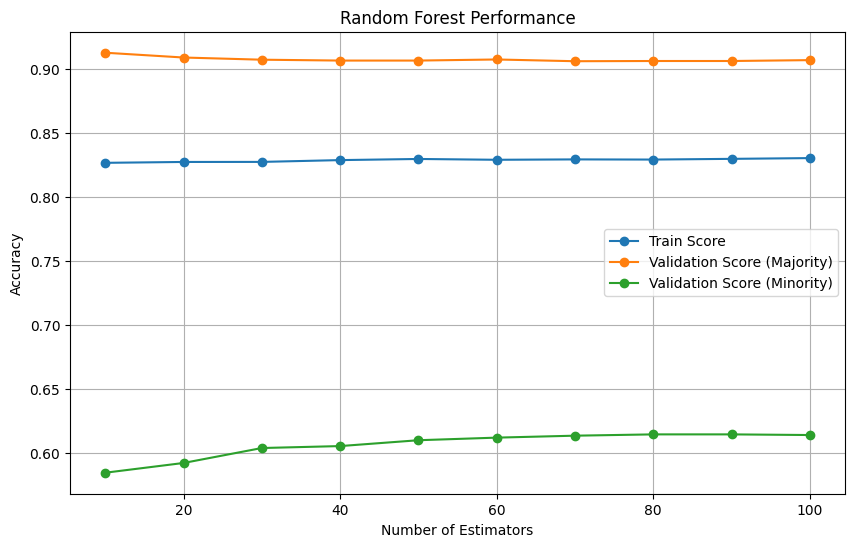

Classification Report (Final Model):
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      5876
        >50K       0.69      0.58      0.63      1972

    accuracy                           0.83      7848
   macro avg       0.78      0.75      0.76      7848
weighted avg       0.82      0.83      0.82      7848



In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Over-sample important features
X_train_oversampled = pd.concat([X_train, X_train_important], axis=1)
X_val_oversampled = pd.concat([X_val, X_val_important], axis=1)
X_test_oversampled = pd.concat([X_test, X_test_important], axis=1)

# Fine-tuning Random Forest
n_estimators_list = np.arange(10, 101, 10)
train_scores = []
val_scores_majority = []
val_scores_minority = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_features='sqrt',
                                random_state=42,
                                warm_start=True,
                                n_jobs=-1)

    # Using cross-validation for train scores
    train_score = cross_val_score(rf, X_train_oversampled, y_train, cv=kf,scoring='accuracy').mean()

    # Fit the model on the training data
    rf.fit(X_train_oversampled, y_train)

    # Validation scores
    y_val_pred = rf.predict(X_val_oversampled)
    val_score_majority = accuracy_score(y_val[y_val == '<=50K'], y_val_pred[y_val == '<=50K'])
    val_score_minority = accuracy_score(y_val[y_val == '>50K'], y_val_pred[y_val == '>50K'])

    train_scores.append(train_score)
    val_scores_majority.append(val_score_majority)
    val_scores_minority.append(val_score_minority)

    print(f"n_estimators: {n_estimators}, Train Score: {train_score:0.3f}, Validation Score (Majority): {val_score_majority:0.3f}, Validation Score (Minority): {val_score_minority:0.3f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_list, val_scores_majority, label='Validation Score (Majority)', marker='o')
plt.plot(n_estimators_list, val_scores_minority, label='Validation Score (Minority)', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance')
plt.legend()
plt.grid(True)
plt.show()

# Train final model with the best number of estimators
best_n_estimators = n_estimators_list[np.argmax(val_scores_majority)]
rf_final = RandomForestClassifier(n_estimators=best_n_estimators,
                                  max_features='sqrt',
                                  random_state=42,
                                  n_jobs=-1)
rf_final.fit(X_train_oversampled, y_train)

# Final model evaluation
y_test_pred = rf_final.predict(X_test_oversampled)
print("Classification Report (Final Model):")
print(classification_report(y_test, y_test_pred))

In [128]:
# Evaluate final model
y_pred = rf_final.predict(X_test_oversampled)
print(f"Best number of estimators: {best_n_estimators}")
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

Best number of estimators: 10
Classification Report (Random Forest):
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      5876
        >50K       0.69      0.58      0.63      1972

    accuracy                           0.83      7848
   macro avg       0.78      0.75      0.76      7848
weighted avg       0.82      0.83      0.82      7848



n_estimators: 10, Train Score: 0.8193593659026723, Validation Score: 0.8288725424526963
n_estimators: 20, Train Score: 0.8237764486125647, Validation Score: 0.8315490819338051
n_estimators: 30, Train Score: 0.8242860478127803, Validation Score: 0.8312946296273743
n_estimators: 40, Train Score: 0.8239462548712286, Validation Score: 0.8328236168113895
n_estimators: 50, Train Score: 0.8245410052840842, Validation Score: 0.830147889239363
n_estimators: 60, Train Score: 0.8244985695065381, Validation Score: 0.832441126442661
n_estimators: 70, Train Score: 0.825390496659175, Validation Score: 0.8325686773595093
n_estimators: 80, Train Score: 0.8253905056803861, Validation Score: 0.8343524416135881
n_estimators: 90, Train Score: 0.825857696166689, Validation Score: 0.8338427250916443
n_estimators: 100, Train Score: 0.8265797178273386, Validation Score: 0.8346072998745602


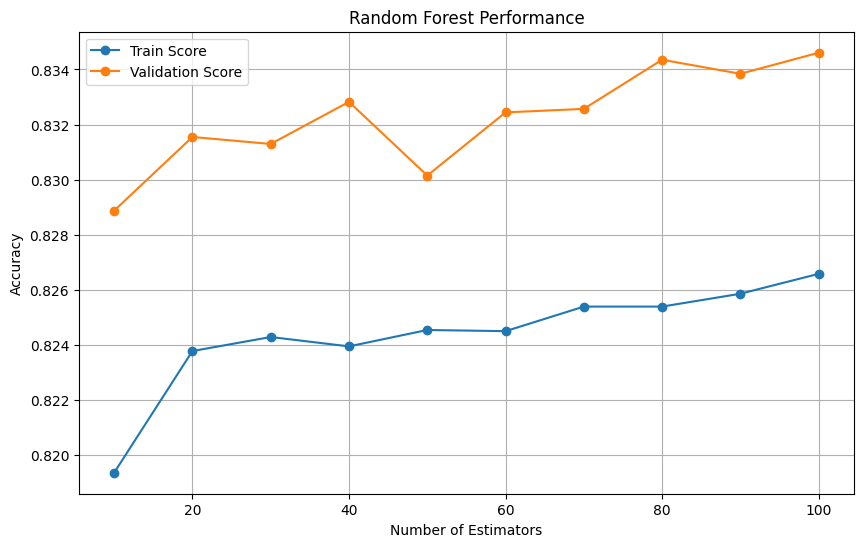

Best number of estimators: 100
Classification Report (Random Forest):
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      5876
        >50K       0.68      0.61      0.64      1972

    accuracy                           0.83      7848
   macro avg       0.78      0.76      0.77      7848
weighted avg       0.83      0.83      0.83      7848



In [129]:
# Fine-tuning Random Forest
n_estimators_list = np.arange(10, 101, 10)
train_scores = []
val_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_features='sqrt',
                                random_state=42,
                                warm_start=True,
                                n_jobs=-1)
    rf.fit(X_train, y_train)

    # Cross-validation for train scores
    train_cv_scores = cross_val_score(rf, X_train, y_train, cv=kf)
    train_score = np.mean(train_cv_scores)

    # Cross-validation for validation scores
    val_cv_scores = cross_val_score(rf, X_val, y_val, cv=kf)
    val_score = np.mean(val_cv_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

    print(f"n_estimators: {n_estimators}, Train Score: {train_score}, Validation Score: {val_score}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_list, val_scores, label='Validation Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance')
plt.legend()
plt.grid(True)
plt.show()

# Train final model with the best number of estimators
best_n_estimators = n_estimators_list[np.argmax(val_scores)]
rf_final = RandomForestClassifier(n_estimators=best_n_estimators,
                                  max_features='sqrt',
                                  random_state=42,
                                  n_jobs=-1)
rf_final.fit(X_train, y_train)

# Evaluate final model
y_pred = rf_final.predict(X_test)
print(f"Best number of estimators: {best_n_estimators}")
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))


The following is the implementation of Extremeclassifier.The idea is to pick random threshold for each feature during split.

n_estimators: 10, Train Score: 0.7962535902165325, Validation Score: 0.8023681764116054
n_estimators: 20, Train Score: 0.7965934372853516, Validation Score: 0.806829779201325
n_estimators: 30, Train Score: 0.7980374986490736, Validation Score: 0.8065750021312613
n_estimators: 40, Train Score: 0.7998213890391923, Validation Score: 0.8063202250611976
n_estimators: 50, Train Score: 0.7994390791291933, Validation Score: 0.8065749209403531
n_estimators: 60, Train Score: 0.7999487865839432, Validation Score: 0.807466640685576
n_estimators: 70, Train Score: 0.7996939554095963, Validation Score: 0.8067022282844768
n_estimators: 80, Train Score: 0.7993542256165231, Validation Score: 0.8067025530481097
n_estimators: 90, Train Score: 0.7991417851136664, Validation Score: 0.807849618199754
n_estimators: 100, Train Score: 0.7995664766739444, Validation Score: 0.8083595782944226


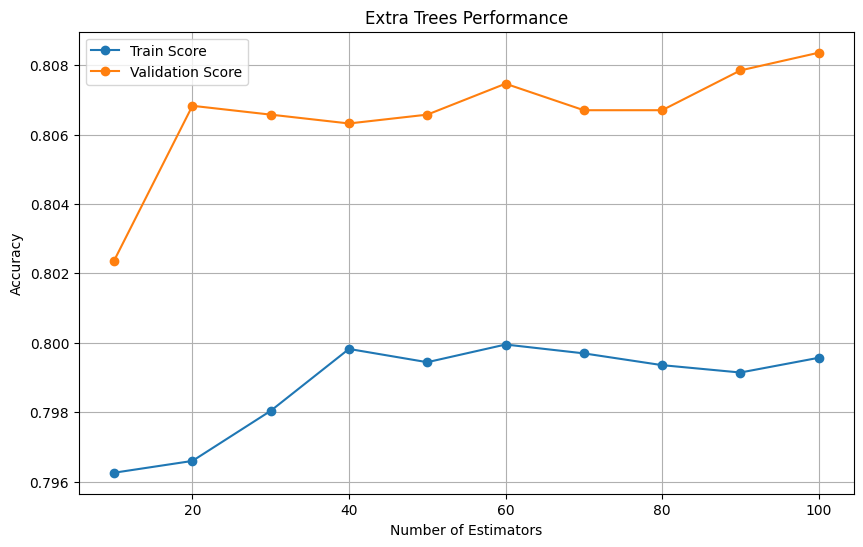

Best number of estimators: 100
Classification Report (Extra Trees):
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      5876
        >50K       0.63      0.59      0.61      1972

    accuracy                           0.81      7848
   macro avg       0.75      0.74      0.74      7848
weighted avg       0.81      0.81      0.81      7848



In [130]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators_list = np.arange(10, 101, 10)
train_scores = []
val_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n_estimators in n_estimators_list:
    et = ExtraTreesClassifier(n_estimators=n_estimators,
                              max_features='sqrt',
                              random_state=42,
                              warm_start=True,
                              n_jobs=-1)
    et.fit(X_train, y_train)

    # Cross-validation for train scores
    train_cv_scores = cross_val_score(et, X_train, y_train, cv=kf)
    train_score = np.mean(train_cv_scores)

    # Cross-validation for validation scores
    val_cv_scores = cross_val_score(et, X_val, y_val, cv=kf)
    val_score = np.mean(val_cv_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

    print(f"n_estimators: {n_estimators}, Train Score: {train_score}, Validation Score: {val_score}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_list, val_scores, label='Validation Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Extra Trees Performance')
plt.legend()
plt.grid(True)
plt.show()

# Train final model with the best number of estimators
best_n_estimators = n_estimators_list[np.argmax(val_scores)]
et_final = ExtraTreesClassifier(n_estimators=best_n_estimators,
                                max_features='sqrt',
                                random_state=42,
                                n_jobs=-1)
et_final.fit(X_train, y_train)

# Evaluate final model
y_pred = et_final.predict(X_test)
print(f"Best number of estimators: {best_n_estimators}")
print("Classification Report (Extra Trees):")
print(classification_report(y_test, y_pred))

The following is code for Logistic Regression. I use maxminscaller.Since,I already performed the log transform , distribution will not be an issue for maxminscaller. Also , some features has very high scalled value  compared to other, so I find it better to use the maxminscaller.Also below, I attached a code where I showed how sensitive logistic regression with respect to different scalled data.

In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict and generate classification report
y_val_pred = log_reg.predict(X_val_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Classification Report (Validation Set):
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      5877
        >50K       0.72      0.60      0.66      1971

    accuracy                           0.84      7848
   macro avg       0.80      0.76      0.78      7848
weighted avg       0.84      0.84      0.84      7848

Classification Report (Test Set):
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      5876
        >50K       0.70      0.60      0.65      1972

    accuracy                           0.83      7848
   macro avg       0.79      0.76      0.77      7848
weighted avg       0.83      0.83      0.83      7848



Finally, in conclusion, I find it to use decision trees for this classification. Later ,I will definitely try gradient boosting and adaboost for this problem.

Showing the fact that Decision trees are sensitive to duplicate rows


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


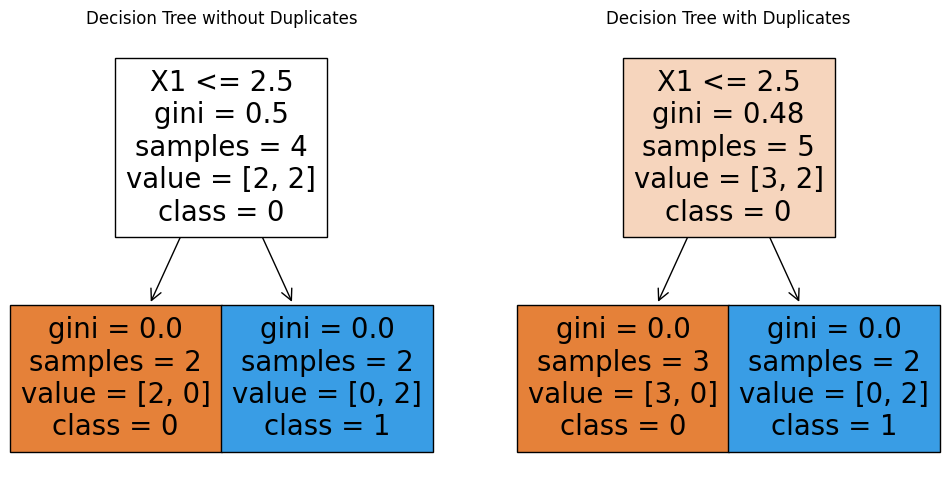

Prediction without duplicates: 0
Prediction with duplicates: 0


In [134]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Original dataset without duplicates
data = {'X1': [1, 2, 3, 4], 'X2': [1, 1, 2, 2], 'Y': [0, 0, 1, 1]}
df = pd.DataFrame(data)

# Dataset with duplicates
data_dup = {'X1': [1, 2, 2, 3, 4], 'X2': [1, 1, 1, 2, 2], 'Y': [0, 0, 0, 1, 1]}
df_dup = pd.DataFrame(data_dup)

# Split into features and target
X = df[['X1', 'X2']]
y = df['Y']

X_dup = df_dup[['X1', 'X2']]
y_dup = df_dup['Y']

# Train decision tree without duplicates
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Train decision tree with duplicates
clf_dup = DecisionTreeClassifier()
clf_dup.fit(X_dup, y_dup)

# Test example
X_test = [[2, 2]]

# Prediction without duplicates
pred_without_dup = clf.predict(X_test)

# Prediction with duplicates
pred_with_dup = clf_dup.predict(X_test)

# Plot the trees
plt.figure(figsize=(12, 6))

plt.subplot(121)
tree.plot_tree(clf, filled=True, feature_names=['X1', 'X2'], class_names=['0', '1'])
plt.title("Decision Tree without Duplicates")

plt.subplot(122)
tree.plot_tree(clf_dup, filled=True, feature_names=['X1', 'X2'], class_names=['0', '1'])
plt.title("Decision Tree with Duplicates")

plt.show()

print(f"Prediction without duplicates: {pred_without_dup[0]}")
print(f"Prediction with duplicates: {pred_with_dup[0]}")


Logistic regression is sensitive to feature scalling


In [133]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Example data
data = np.array([[25, 30, 0],
                 [40, 50, 1],
                 [60, 80, 1],
                 [35, 20, 0],
                 [50, 70, 1]])

X = data[:, :-1]  # Features
y = data[:, -1]   # Target variable

# Logistic regression without feature scaling
lr_unscaled = LogisticRegression(fit_intercept=True)
lr_unscaled.fit(X, y)

print("Logistic Regression without Feature Scaling:")
print("Intercept:", lr_unscaled.intercept_)
print("Coefficients:", lr_unscaled.coef_)

# Make a prediction for a new data point
new_point_unscaled = np.array([45, 60])
prob_unscaled = lr_unscaled.predict_proba(new_point_unscaled.reshape(1, -1))
print(f"Predicted probability of y=1 (unscaled): {prob_unscaled[0, 1]:.2f}")

# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic regression with feature scaling
lr_scaled = LogisticRegression(fit_intercept=True)
lr_scaled.fit(X_scaled, y)

print("\nLogistic Regression with Feature Scaling:")
print("Intercept:", lr_scaled.intercept_)
print("Coefficients:", lr_scaled.coef_)

# Make a prediction for the same new data point
new_point_scaled = scaler.transform(new_point_unscaled.reshape(1, -1))
prob_scaled = lr_scaled.predict_proba(new_point_scaled)
print(f"Predicted probability of y=1 (scaled): {prob_scaled[0, 1]:.2f}")

Logistic Regression without Feature Scaling:
Intercept: [-18.13646191]
Coefficients: [[0.17724048 0.30631138]]
Predicted probability of y=1 (unscaled): 1.00

Logistic Regression with Feature Scaling:
Intercept: [0.65029458]
Coefficients: [[0.66927198 0.83247203]]
Predicted probability of y=1 (scaled): 0.77
